GGGGG

In [3]:
import sys
sys.path.append('../src')

In [9]:
import importlib
import miscellaneous as misc

importlib.reload(misc)
# importlib.reload(fish_algo)

from spectrum import Spectrum
import torch
import numpy as np


In [10]:
x = torch.tensor(np.linspace(-10, 10, 1000))
x0= torch.tensor([.1, 5, -9, -1, 9])
ws = torch.tensor([0.5, 1, 0.5, 2, 0.25])
amp = torch.tensor([1, 4, 6, 9, 0.8])
gau = torch.tensor([0.5, .5, 1, 0, 0.25])

data = misc.voigt_(x, amp, ws, x0, gau, True)
# plt.plot(data.tolist())

spc_small = Spectrum(
    x, data
)

In [11]:
x = torch.tensor(np.linspace(-10, 10, 1000))
x0= torch.tensor([-10, 0, -4,  -4.5, 7.1, 7.2, 5, -9, -1, 9, 9.5, 9.1, 8.3, 6.6666, 5.432, ])
ws = torch.tensor([0.5, 1, 0.5, 2, 0.25, 10, 2.3, 4.8, 1., 1., 1., 0.1, 0.01, 6, 7.7])
amp = torch.tensor([1, 4, 6, 9, 0.8, 
                    0.1, 0.9, 2.4, 4.4, 0.4,
                    9.1, 7.7, 4.0, 4.0, 9.8])
gau = torch.tensor([0.5, .5, 1, 0, 0.25,
                    0.55, 0.67, 0.67, 1., 1.,
                      0., 0.02, 0.2, 0.48, .33])

In [12]:
data = misc.voigt_(x, amp, ws, x0, gau, True)
# plt.plot(data.tolist())

spc_medium = Spectrum(
    x, data
)

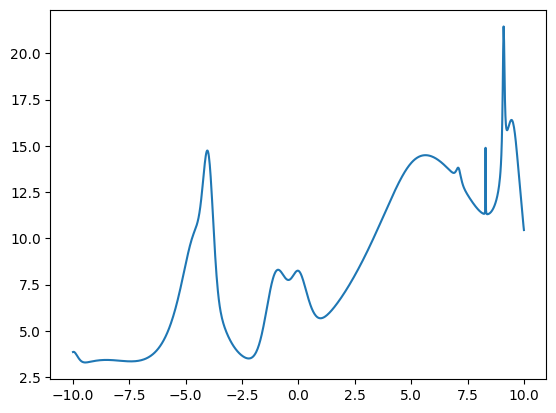

In [14]:
import matplotlib.pyplot as plt
plt.plot(x, data)

In [25]:
from matrix import Matrix
import pandas as pd
from scan import get_spectra_list
from enumerations import BaseLineMode, NormMode
from smoothing import Smoother

mtr = Matrix.create_matrix(
    get_spectra_list(path='../data/raw_data', recursive=True)[:10],
    {
        'smooth': {'method': Smoother.savgol},
        'baseline': {'method': BaseLineMode.ALSS},
        'normalize': {'method': NormMode.MINMAX},
        'range': (900, 1700)
    }
)

In [26]:
mtr.save_matrix('../data/matrix.csv')

In [27]:
real_spectra = mtr.spectra